In [21]:
# !pip install statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# AR model
import statsmodels.tsa.ar_model as sm
# from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [22]:
url = 'https://raw.githubusercontent.com/mnuzen/156b-learning-support/master/data/us/covid/confirmed_cases.csv'
df = pd.read_csv(url, header=0)

In [23]:
cum_cases = df.iloc[:, 4:]
countyFIPS = df.iloc[:, 0]
daily_cases = cum_cases.diff(axis=1)
daily_cases.iloc[:,0] = cum_cases.iloc[:, 0]

# scale the data (values will be between 0 and 1) to increase the training speed and performance of the model
# scaler = MinMaxScaler()
# scaler.fit(daily_cases)
# daily_cases_scaled = scaler.transform(daily_cases)

# we will use daily data to train
test_size = 14
train_data = cum_cases.iloc[:, :-test_size].to_numpy()
test_data = cum_cases.iloc[:, -test_size:].to_numpy()

AttributeError: 'DataFrame' object has no attribute 'to_numpy'

Coefficients: [ 0.0184949   1.53061224 -0.75765306  1.24234694 -2.45089286  2.95089286]
predicted=10.735969, expected=9.000000
predicted=16.374570, expected=10.000000
predicted=27.143901, expected=10.000000
predicted=34.193267, expected=9.000000
predicted=46.475904, expected=11.000000
predicted=70.518971, expected=13.000000
predicted=97.015792, expected=14.000000
predicted=149.117050, expected=15.000000
predicted=229.356797, expected=18.000000
predicted=322.934074, expected=20.000000
predicted=476.106188, expected=22.000000
predicted=689.834477, expected=28.000000
predicted=974.259941, expected=29.000000
predicted=1445.397073, expected=30.000000
Test RMSE: 514.640


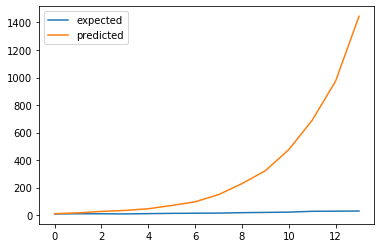

In [97]:
i = 3
model = sm.AR(train_data[i])
model_fit = model.fit(maxlag=2)
print('Coefficients: %s' % model_fit.params)
# make predictions

predictions = model_fit.predict(start=len(train_data[i]), end=len(train_data[i])+len(test_data[i])-1, dynamic=True)
for j in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[j], test_data[i, j]))

rmse = sqrt(mean_squared_error(test_data[i], predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test_data[i], label='expected')
plt.plot(predictions, label='predicted')
plt.legend()
plt.show()

In [93]:
arr_pred = []
for i in range(len(train_data)):
    model = sm.AR(train_data[i])
    model_fit = model.fit(maxlag=2)

    # make predictions
    predictions = model_fit.predict(start=len(train_data[i]), end=len(train_data[i])+len(test_data[i])-1, dynamic=False)
    arr_pred.append(predictions)

In [94]:
daily_pred = np.asarray(arr_pred)
cum_pred = np.zeros((len(train_data), test_size))
cum_pred[:, 0]= np.add(cum_cases.iloc[:, -15], daily_pred[:, 0])
for i in range(1, 14):
    cum_pred[:, i]= np.add(cum_pred[:, i-1], daily_pred[:, i])
print(cum_pred)
print(cum_cases.iloc[:, -test_size:])

rmse = sqrt(mean_squared_error(cum_pred, cum_cases.iloc[:, -test_size:]))
print('Test RMSE: %.3f' % rmse)

[[   0.            0.            0.         ...    0.
     0.            0.        ]
 [  36.40017471   59.38133642   83.44477667 ...  409.72630124
   464.5289531   524.35520857]
 [ 127.48744448  205.77406052  295.26040748 ... 2022.43451864
  2382.45680464 2795.8969689 ]
 ...
 [   7.20516836   11.85455155   15.85206015 ...   75.01535598
    83.67479989   94.45443068]
 [  11.75525661   19.49609552   28.95177169 ...  220.2417241
   262.14619653  311.13234358]
 [   0.            0.            0.         ...    0.
     0.            0.        ]]
      4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  4/15/20  4/16/20  4/17/20  \
0           0        0        0        0        0        0        0        0   
1          17       19       19       19       23       25       25       25   
2          59       66       71       78       87       98      102      103   
3           9       10       10        9       11       13       14       15   
4          11       13       16       17       17    